In [5]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 48.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [13]:
listingDF =  pd.read_csv('listings.csv')
newListingsDF = listingDF[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   amenities          3818 non-null   object 
 4   number_of_reviews  3818 non-null   int64  
 5   price              3818 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


In [15]:
# Creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [17]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/631897346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/631897346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
/var/folders/jq/99v6jxw10lb65zh

In [19]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/937827799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.drop('amenities', axis=1, inplace=True)


In [21]:
# Removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

In [23]:
newListingsDF.head()

room_type property_type  bedrooms  number_of_reviews    price  \
0  Entire home/apt     Apartment       1.0                207   $85.00   
1  Entire home/apt     Apartment       1.0                 43  $150.00   
2  Entire home/apt         House       5.0                 20  $975.00   
3  Entire home/apt     Apartment       0.0                  0  $100.00   
4  Entire home/apt         House       3.0                 38  $450.00   

   breakfast   tv  white_goods  elevator  gym  hot_tub_sauna_or_pool  \
0        NaN  1.0          1.0       NaN  NaN                    NaN   
1        NaN  1.0          1.0       NaN  NaN                    NaN   
2        NaN  1.0          1.0       NaN  NaN                    NaN   
3        NaN  NaN          1.0       NaN  NaN                    NaN   
4        NaN  1.0          NaN       NaN  NaN                    NaN   

   internet  pets_allowed  secure  accessible  
0       1.0           NaN     NaN         NaN  
1       1.0           NaN     1.0         NaN  
2       1.0           1.0     NaN         NaN  
3       1.0           NaN     1.0         NaN  
4       1.0           NaN     NaN         NaN

In [25]:
# Checking to see the total number of each type of property 
newListingsDF.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

In [27]:
# Grouping property types with less than <30 count into 'Other'
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: count, dtype: int64

In [29]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3818 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   int64  
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

In [31]:
# To convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

In [33]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   number_of_reviews                3818 non-null   int64  
 2   price                            3818 non-null   int64  
 3   breakfast                        3818 non-null   float64
 4   tv                               3818 non-null   float64
 5   white_goods                      3818 non-null   float64
 6   elevator                         3818 non-null   float64
 7   gym                              3818 non-null   float64
 8   hot_tub_sauna_or_pool            3818 non-null   float64
 9   internet                         3818 non-null   float64
 10  pets_allowed                     3818 non-null   float64
 11  secure                           3818 non-null   float64
 12  accessible          

In [35]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [37]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [41]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [128.94789004]

                         Predictors  Coefficients
0                          bedrooms  5.091024e+01
1                         breakfast -1.247971e+00
2                                tv  1.013896e+00
3                       white_goods -4.822075e-01
4                          elevator  9.904472e+00
5                               gym  1.228933e+00
6             hot_tub_sauna_or_pool  1.801509e+00
7                          internet -1.969229e+00
8                      pets_allowed -2.393586e+00
9                            secure  1.059557e+00
10                       accessible  1.658448e-01
11                number_of_reviews -3.618393e+00
12        room_type_Entire_home_apt  4.122577e+14
13           room_type_Private_room  4.018625e+14
14            room_type_Shared_room  1.505995e+14
15          property_type_Apartment  7.432040e+14
16  property_type_Bed_and_Breakfast  1.464290e+14
17        property_type_Condominium  2.279939e+14
18

In [43]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

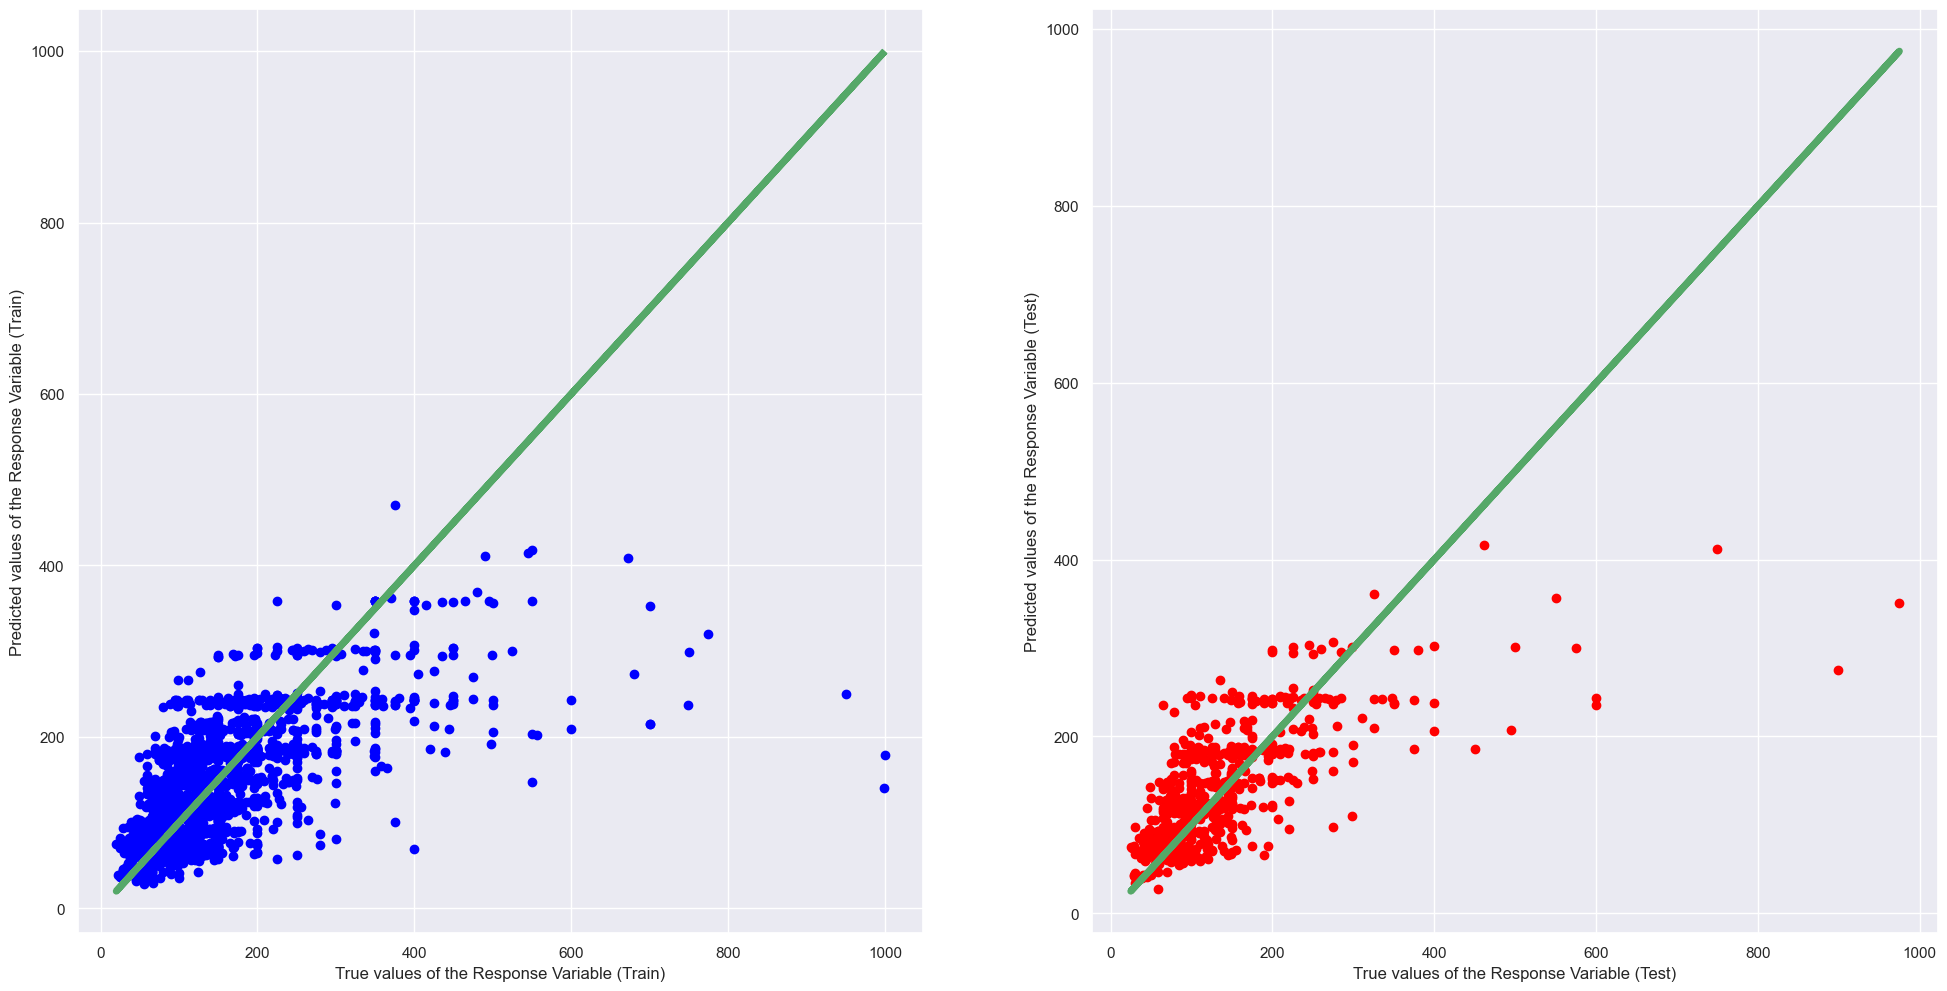

In [45]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [47]:
#numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
"internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"])


In [49]:
# initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

#store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})


lambdas = np.arange(0,2000,1) #lambda value of 0 to positive 2000, in intervals of 1

for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()


bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])


#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

The highest R2 value:  0.5028433294464093
The value of lambda that minimises:  1


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/3473418919.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

variable          1   bedrooms  breakfast        tv  white_goods  elevator  \
0          estimate  50.910236  -1.129452  0.947872    -0.592440  9.916523   
1         estimate0  50.910236  -1.129452  0.947872    -0.592440  9.916523   
2         estimate1  50.393739  -1.037037  1.318792    -0.096522  9.392654   
3         estimate2  50.372942  -1.037672  1.322305    -0.094465  9.384796   
4         estimate3  50.352167  -1.038307  1.325814    -0.092411  9.376952   

variable       gym  hot_tub_sauna_or_pool  internet  pets_allowed  ...  \
0         1.236767               1.767565 -1.995690     -2.216387  ...   
1         1.236767               1.767565 -1.995690     -2.216387  ...   
2         1.025149               1.654508 -1.949323     -2.465966  ...   
3         1.028707               1.655240 -1.949095     -2.465318  ...   
4         1.032255               1.655972 -1.948866     -2.464669  ...   

variable  room_type_Entire_home_apt  room_type_Private room  \
0                      4.122577e+14            4.018625e+14   
1                      4.122577e+14            4.018625e+14   
2                      1.352659e+01           -1.036486e+01   
3                      1.352736e+01           -1.036657e+01   
4                      1.352812e+01           -1.036827e+01   

variable  room_type_Shared_room  property_type_Apartment  \
0                  1.505995e+14             7.432040e+14   
1                  1.505995e+14             7.432040e+14   
2                 -9.370499e+00            -3.169286e+00   
3                 -9.368050e+00            -3.171013e+00   
4                 -9.365604e+00            -3.172736e+00   

variable  property_type_Bed_and_Breakfast  property_type_Condominium  \
0                            1.464290e+14               2.279939e+14   
1                            1.464290e+14               2.279939e+14   
2                            3.025297e+00               6.134992e-01   
3                            3.024298e+00               6.135822e-01   
4                            3.023298e+00               6.136652e-01   

variable  property_type_House  property_type_Loft  property_type_Other  \
0                7.441752e+14        1.521892e+14         2.279939e+14   
1                7.441752e+14        1.521892e+14         2.279939e+14   
2                6.689090e-02        3.020189e+00         4.208011e+00   
3                6.990906e-02        3.018062e+00         4.205366e+00   
4                7.292225e-02        3.015939e+00         4.202724e+00   

variable  property_type_Townhouse  
0                    2.586811e+14  
1                    2.586811e+14  
2                    1.174192e+00  
3                    1.174544e+00  
4                    1.174896e+00  

[5 rows x 23 columns]

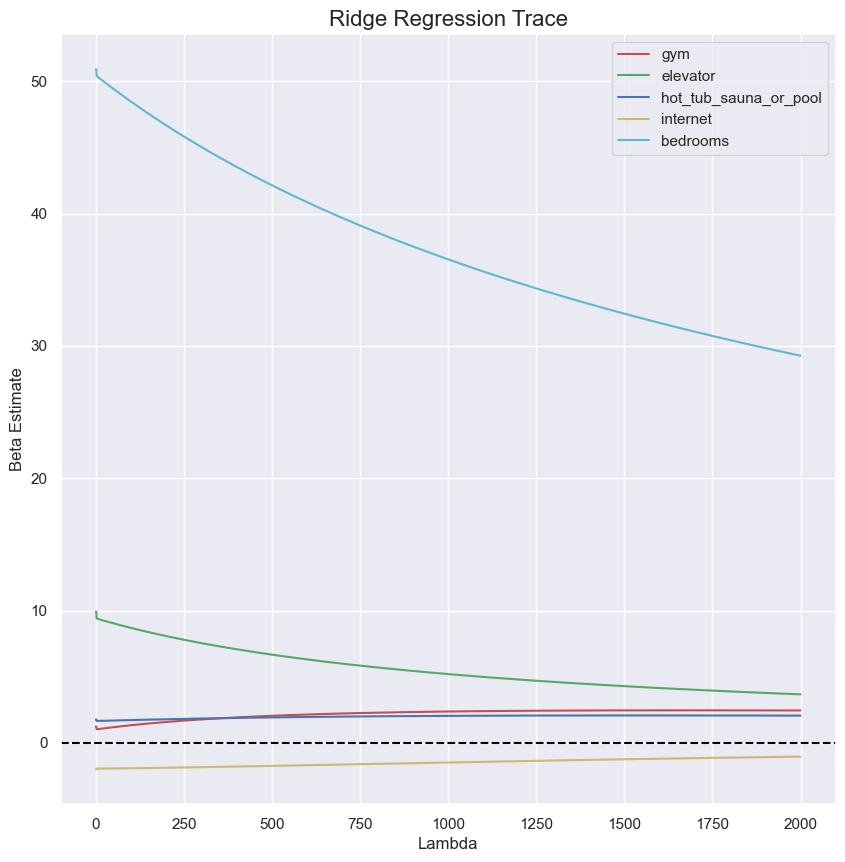

In [51]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.gym,'r',ridgeDF.elevator,'g',ridgeDF.hot_tub_sauna_or_pool,'b',ridgeDF.internet,'y',ridgeDF.bedrooms,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

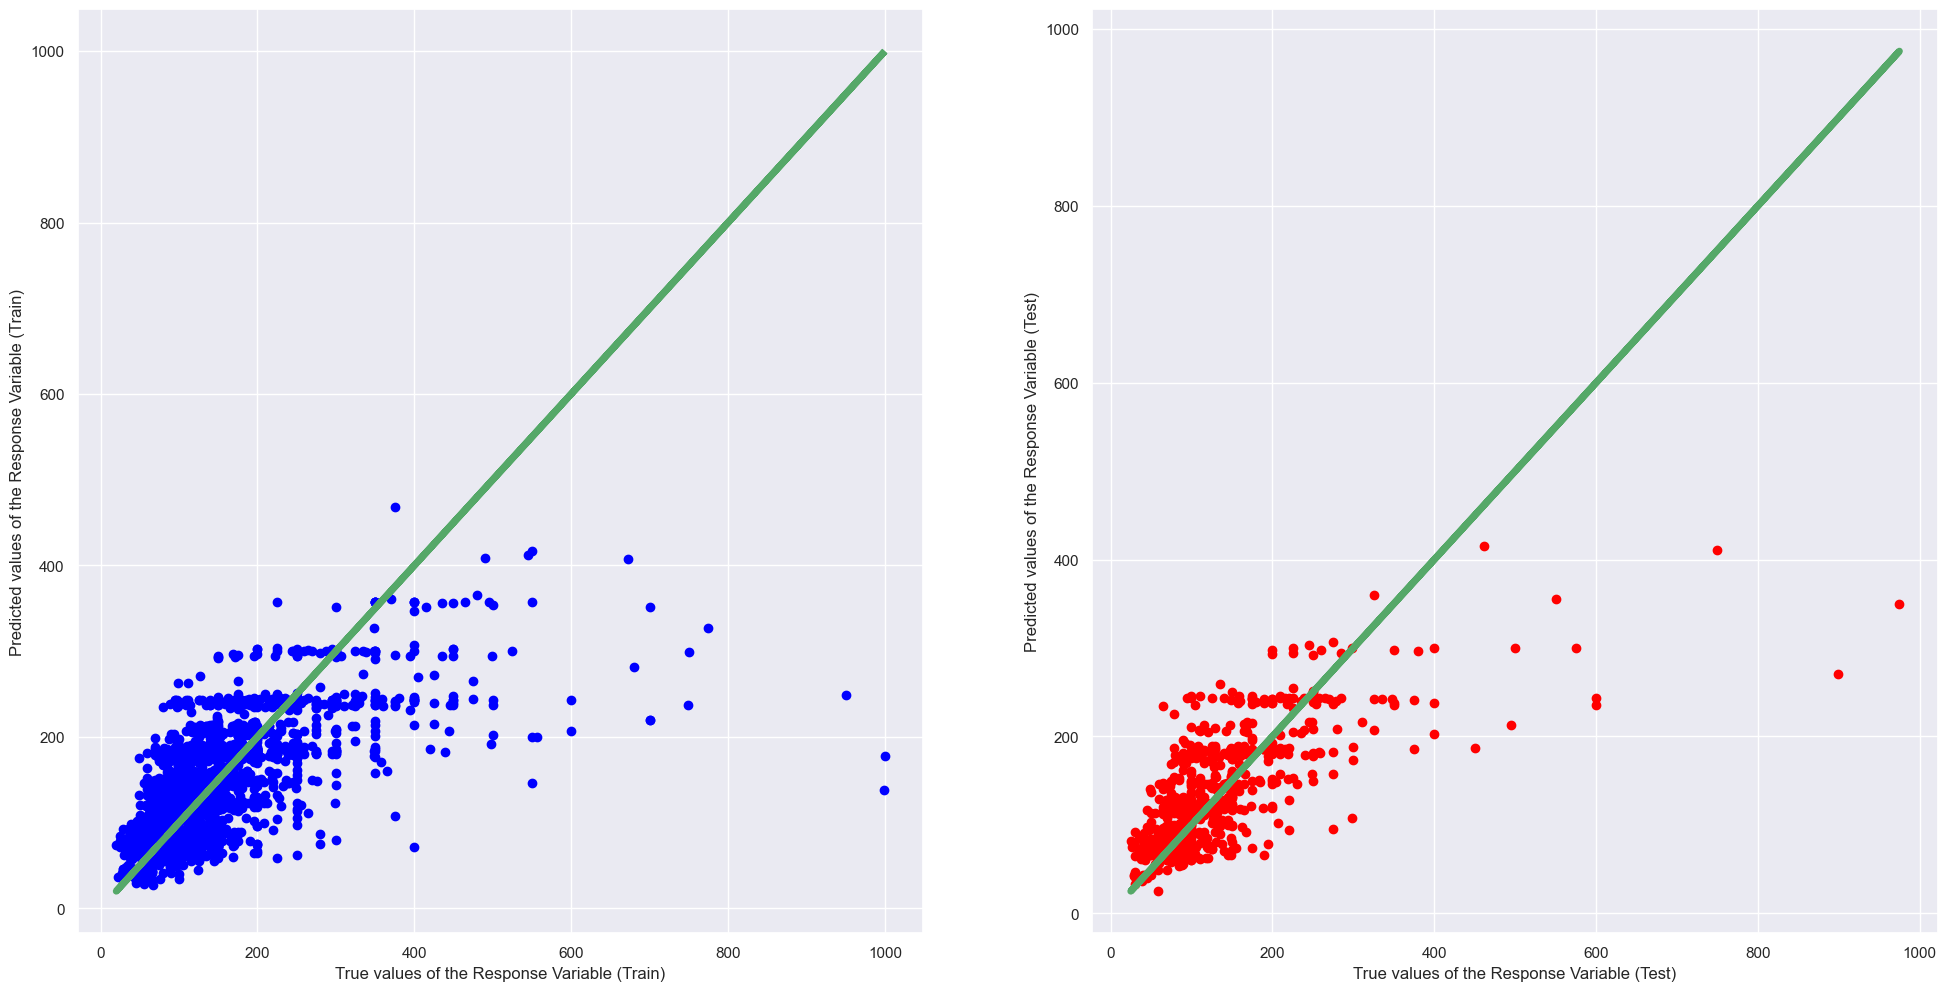

In [53]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionRidge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionRidge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [55]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

The highest R2 value:  0.5028431665871826


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

variable                             1   bedrooms  breakfast        tv  \
0                             estimate  49.893167  -0.000000  0.654335   
1                         estimate0.01  50.407833  -1.024538  1.307803   
2                         estimate0.03  50.394903  -1.000995  1.293033   
3         estimate0.049999999999999996  50.381384  -0.977243  1.278070   
4          estimate0.06999999999999999  50.368539  -0.953730  1.263329   

variable  white_goods  elevator       gym  hot_tub_sauna_or_pool  internet  \
0           -0.000000  8.508357  0.892781               1.186169 -0.809975   
1           -0.087079  9.392497  1.020517               1.648805 -1.939749   
2           -0.063983  9.376127  1.018359               1.638814 -1.920106   
3           -0.040986  9.360111  1.016235               1.628882 -1.900513   
4           -0.017873  9.343686  1.014072               1.618883 -1.880865   

variable  pets_allowed  ...  room_type_Entire_home_apt  \
0            -1.415382  ...                  23.618044   
1            -2.456384  ...                  24.152601   
2            -2.435910  ...                  24.143051   
3            -2.415448  ...                  24.134249   
4            -2.394972  ...                  24.124589   

variable  room_type_Private room  room_type_Shared_room  \
0                           -0.0              -4.733824   
1                           -0.0              -5.482250   
2                           -0.0              -5.468211   
3                           -0.0              -5.454063   
4                           -0.0              -5.440040   

variable  property_type_Apartment  property_type_Bed_and_Breakfast  \
0                       -1.858162                         1.667506   
1                       -3.217782                         3.000841   
2                       -3.190035                         2.975117   
3                       -3.163004                         2.949332   
4                       -3.135150                         2.923618   

variable  property_type_Condominium  property_type_House  property_type_Loft  \
0                          0.168202                 -0.0            2.103748   
1                          0.589495                 -0.0            3.000266   
2                          0.580974                 -0.0            2.982408   
3                          0.572240                 -0.0            2.964412   
4                          0.563751                 -0.0            2.946574   

variable  property_type_Other  property_type_Townhouse  
0                    3.023599                 0.170627  
1                    4.180567                 1.141619  
2                    4.159687                 1.121584  
3                    4.138612                 1.101550  
4                    4.117761                 1.081514  

[5 rows x 23 columns]

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_54458/1407236001.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(-1, 100, 1))


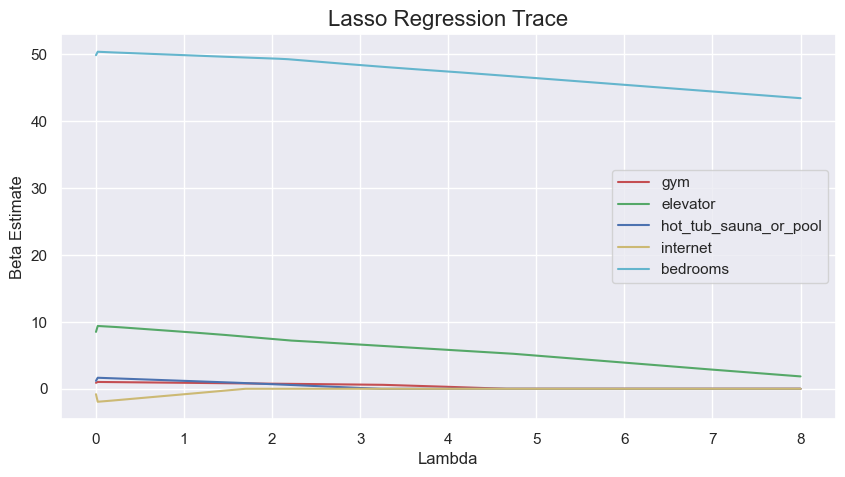

In [57]:
#Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lassoDF.gym,'r',lassoDF.elevator,'g',lassoDF.hot_tub_sauna_or_pool,'b',lassoDF.internet,'y',lassoDF.bedrooms,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

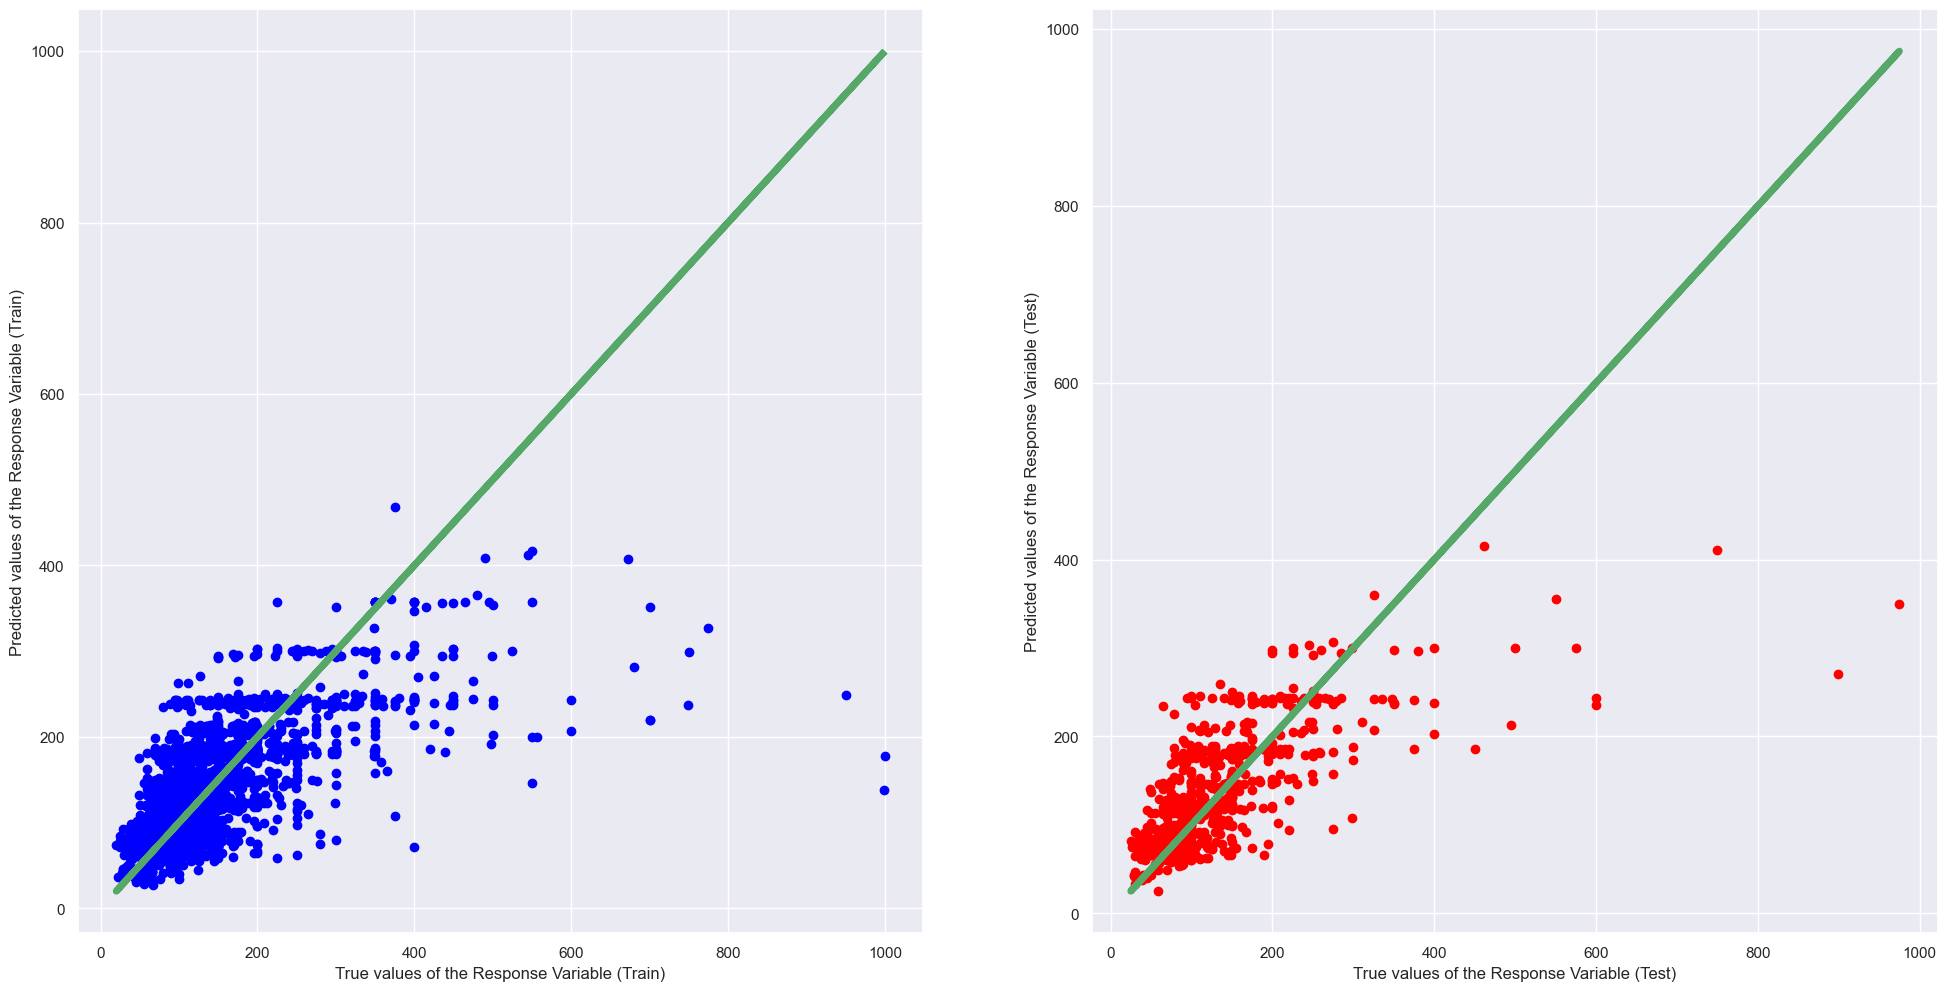

In [59]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [61]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [63]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

Weight
property_type_Bed_and_Breakfast  0.001166
property_type_Loft               0.003453
property_type_Condominium        0.004220
accessible                       0.004272
property_type_Townhouse          0.004575
secure                           0.004636
pets_allowed                     0.004805
breakfast                        0.005252
internet                         0.005761
white_goods                      0.007077
hot_tub_sauna_or_pool            0.010835
property_type_Other              0.012135
gym                              0.013053
room_type_Shared_room            0.016455
elevator                         0.018322
tv                               0.024131
property_type_House              0.025266
property_type_Apartment          0.031119
number_of_reviews                0.043511
room_type_Private_room           0.088067
room_type_Entire_home_apt        0.140780
bedrooms                         0.531109

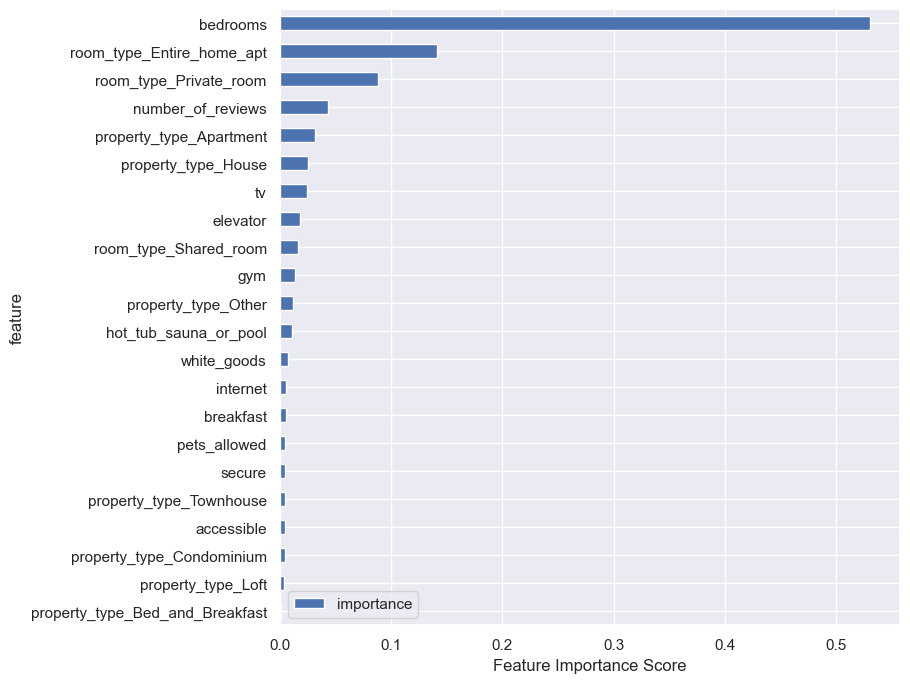

In [65]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

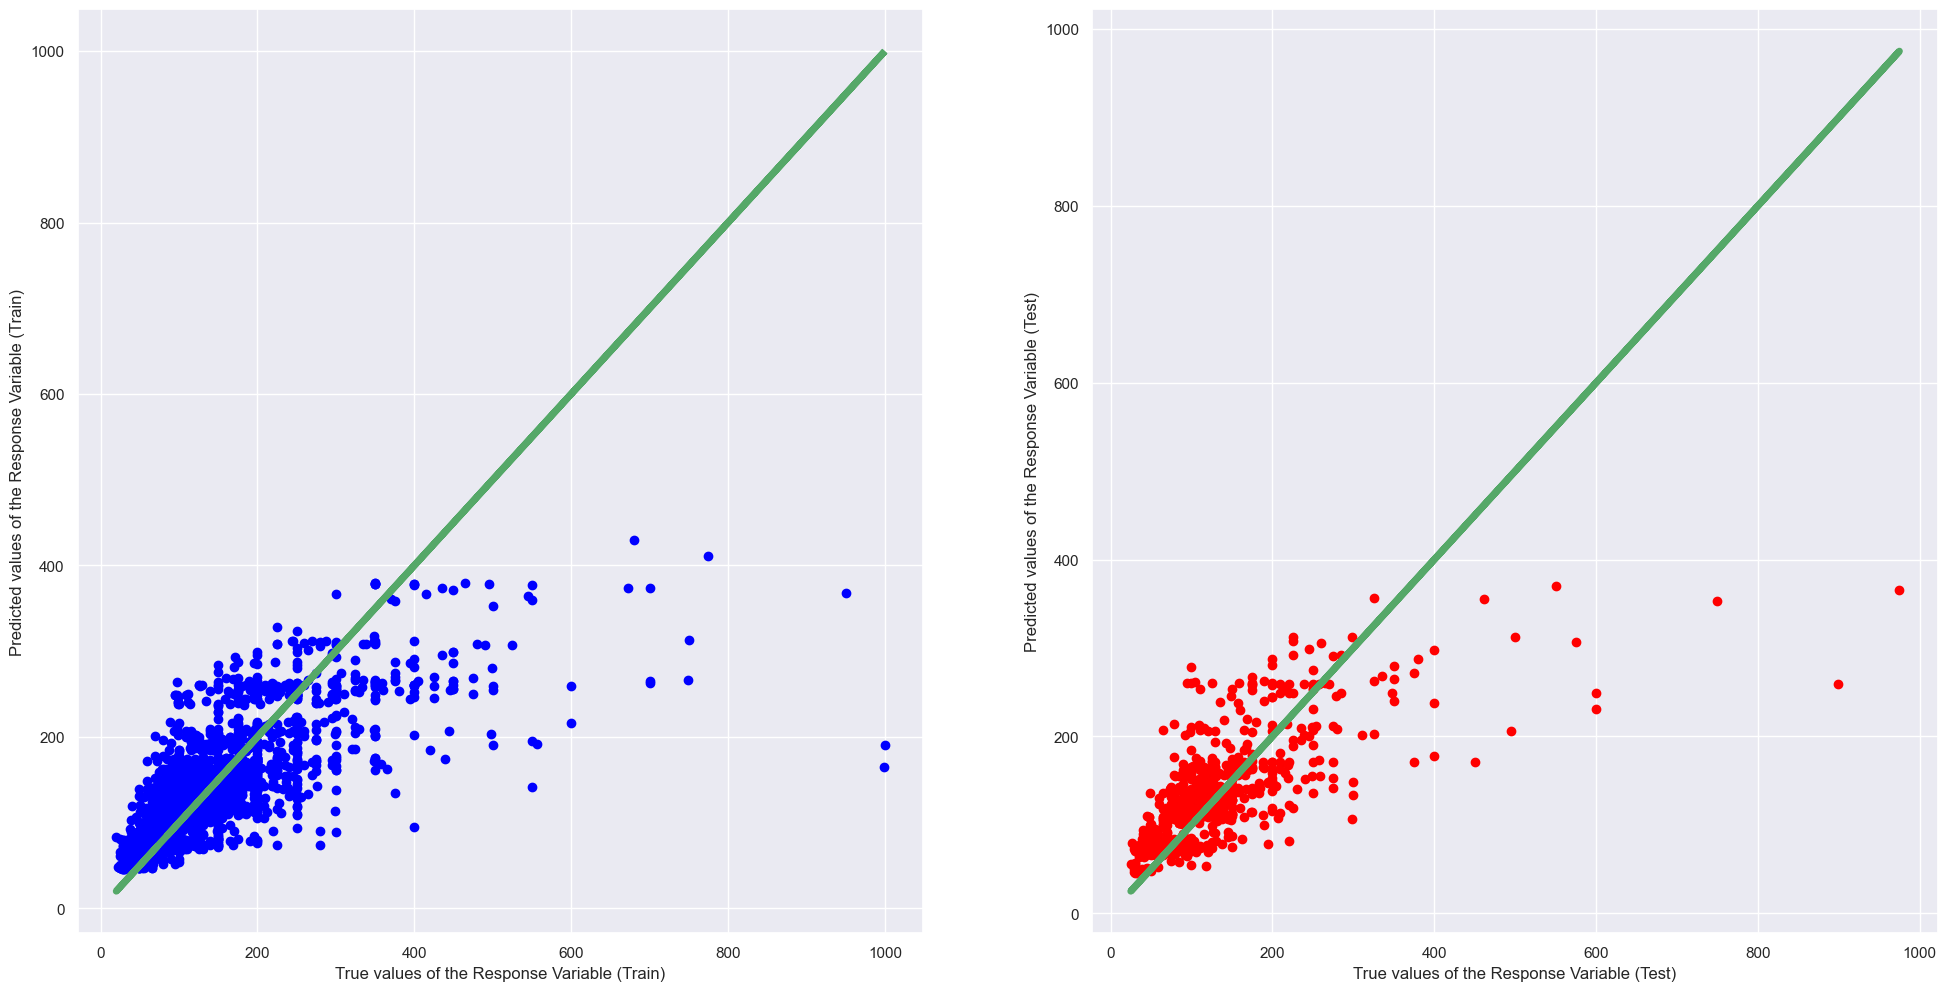

In [67]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [69]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [77]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [86]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
property_type_Bed_and_Breakfast  0.005990
breakfast                        0.009682
property_type_Loft               0.010270
accessible                       0.011440
property_type_Townhouse          0.011590
internet                         0.011778
pets_allowed                     0.012422
white_goods                      0.013425
secure                           0.013987
property_type_Condominium        0.015630
gym                              0.017731
number_of_reviews                0.021618
property_type_Apartment          0.021668
hot_tub_sauna_or_pool            0.023057
tv                               0.025040
elevator                         0.026336
property_type_Other              0.030313
property_type_House              0.064051
room_type_Entire_home_apt        0.091435
room_type_Shared_room            0.110291
room_type_Private_room           0.215825
bedrooms                         0.236423

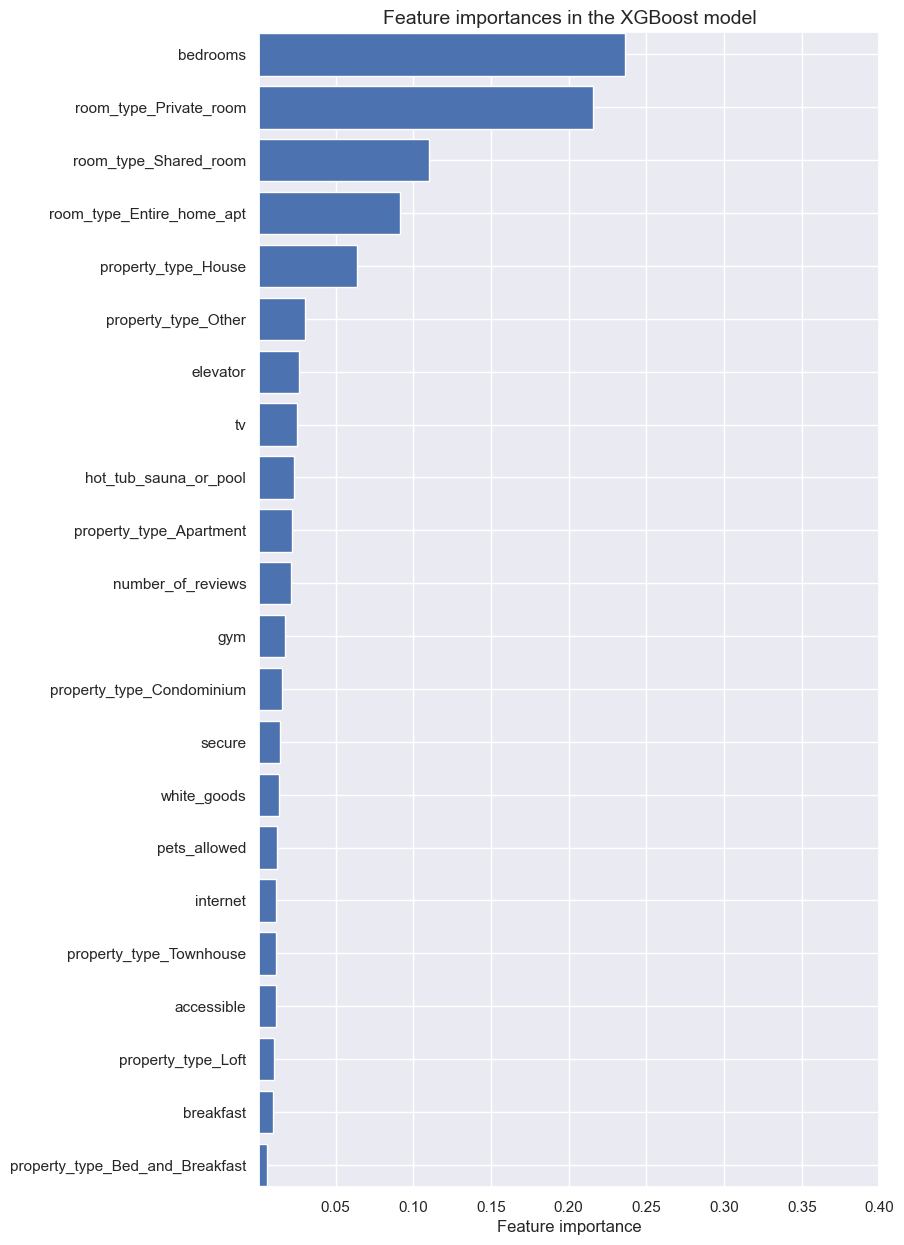

In [88]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

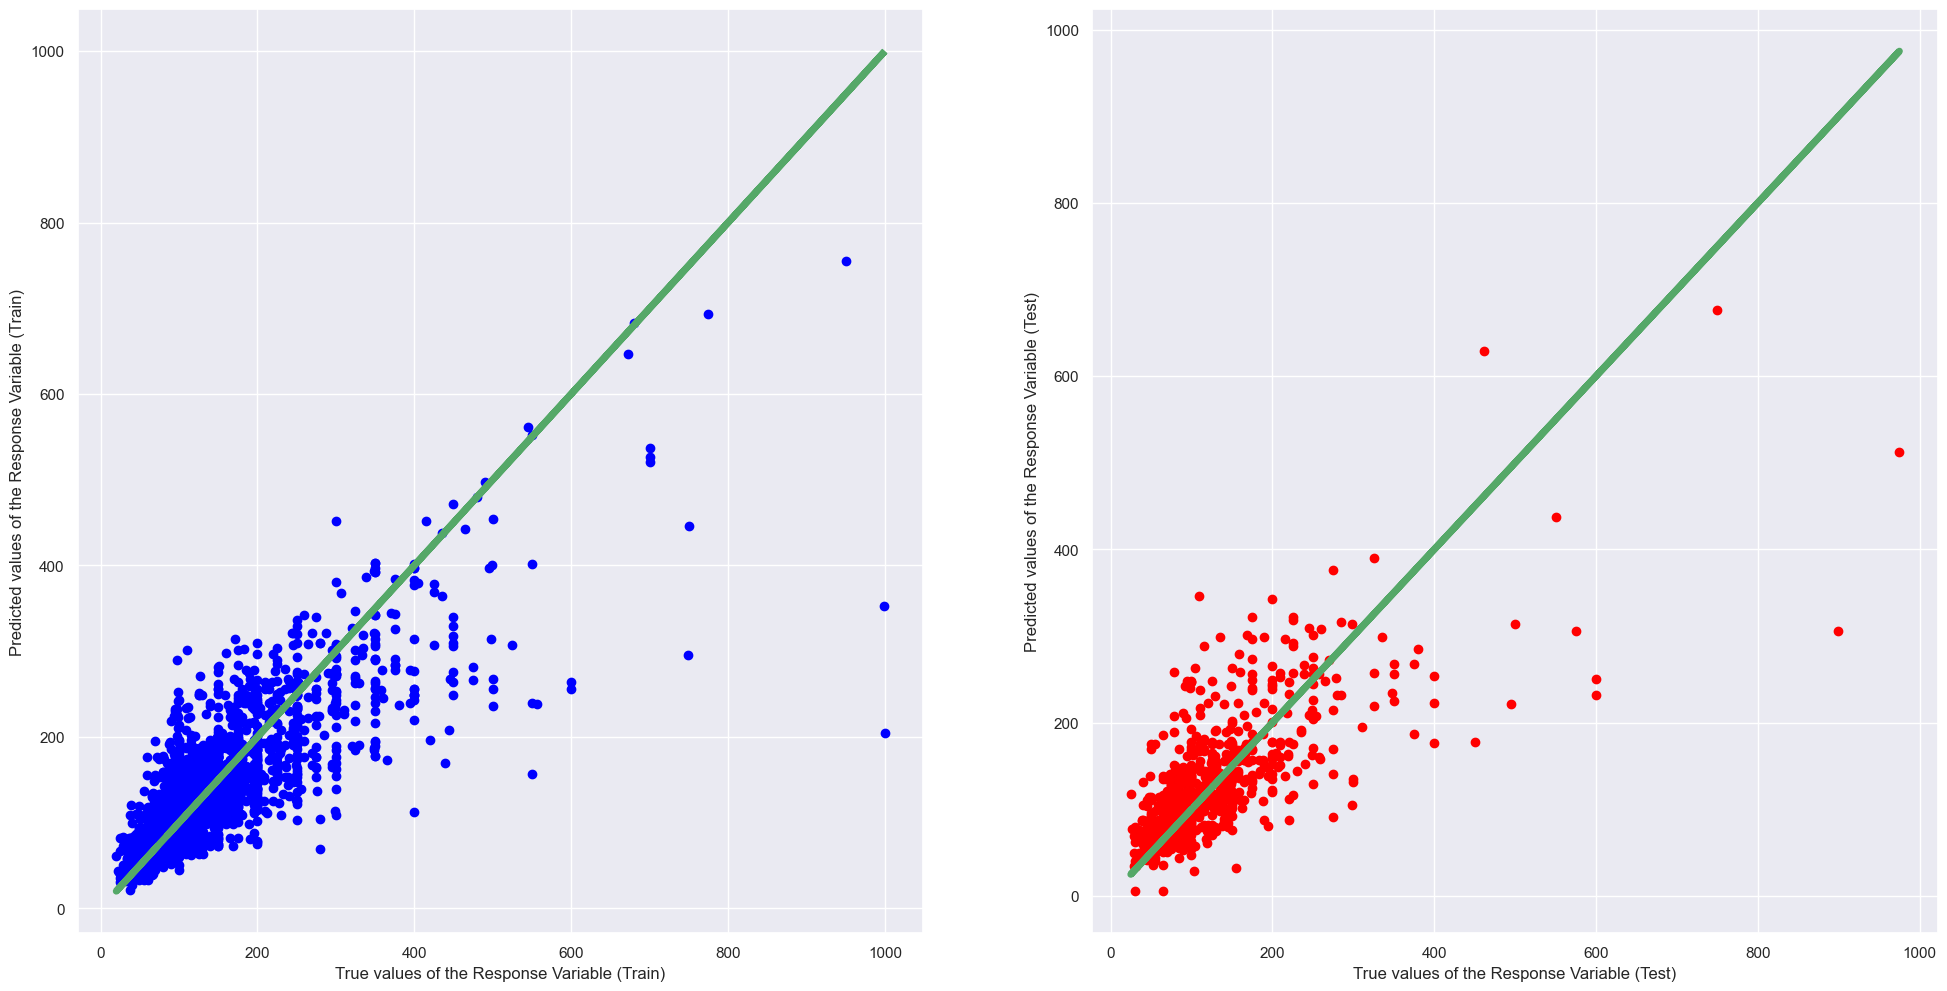

In [90]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [92]:
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 86.0554569	total: 57.3ms	remaining: 1m 54s
1:	learn: 82.5880810	total: 57.9ms	remaining: 57.9s
2:	learn: 79.7798386	total: 58.3ms	remaining: 38.8s
3:	learn: 77.5001014	total: 58.7ms	remaining: 29.3s
4:	learn: 75.4620777	total: 59.1ms	remaining: 23.6s
5:	learn: 73.6588937	total: 59.4ms	remaining: 19.7s
6:	learn: 72.1244091	total: 59.8ms	remaining: 17s
7:	learn: 70.9105207	total: 60.2ms	remaining: 15s
8:	learn: 69.7726919	total: 60.5ms	remaining: 13.4s
9:	learn: 68.8516444	total: 60.9ms	remaining: 12.1s
10:	learn: 68.1022090	total: 61.3ms	remaining: 11.1s
11:	learn: 67.3769071	total: 61.6ms	remaining: 10.2s
12:	learn: 66.7179932	total: 62ms	remaining: 9.47s
13:	learn: 66.2414825	total: 62.2ms	remaining: 8.83s
14:	learn: 65.7013627	total: 62.7ms	remaining: 8.29s
15:	learn: 65.2850844	total: 62.9ms	remaining: 7.8s
16:	learn: 64.9455113	total: 63.2ms	remaining: 7.37s
17:	learn: 64.6709533	total: 63.4ms	remaining: 6.99s
18:	learn: 64.3846414	total: 63.7ms	remaining: 6.64s
19:	learn

(0.001, 20.0)

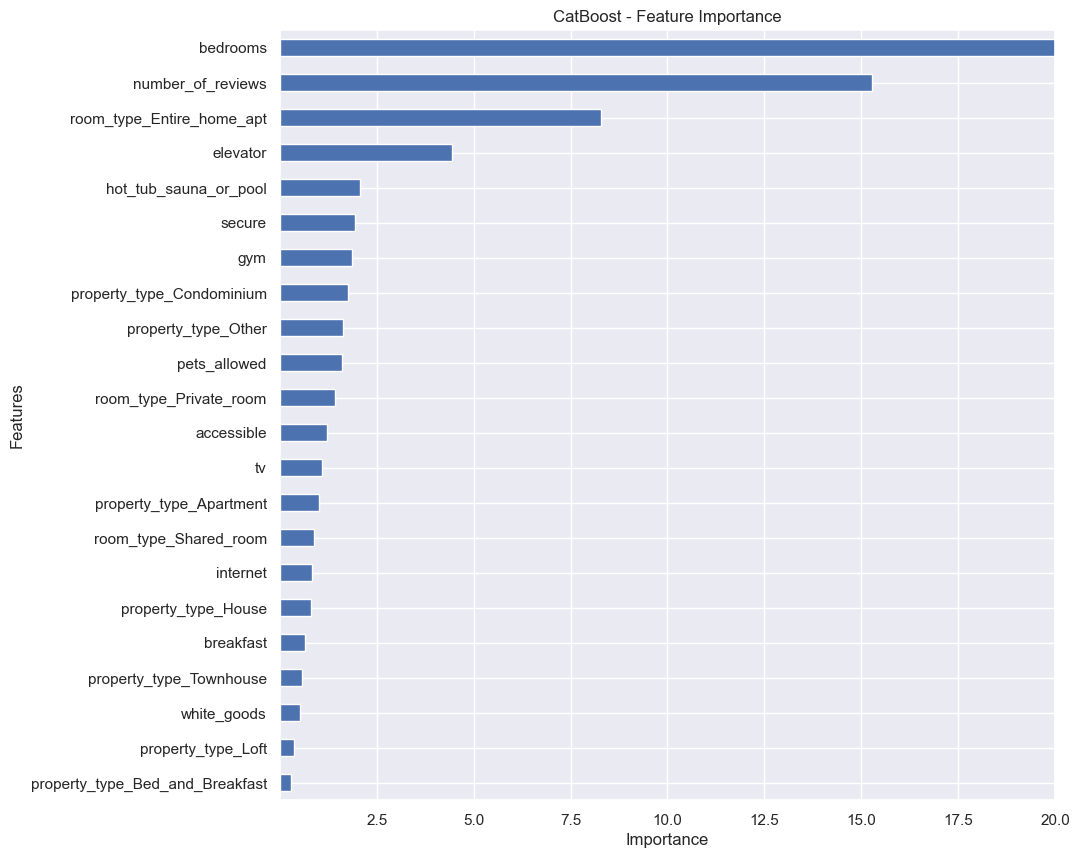

In [94]:
# Plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');
plt.xlim(0.001, 20.0)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

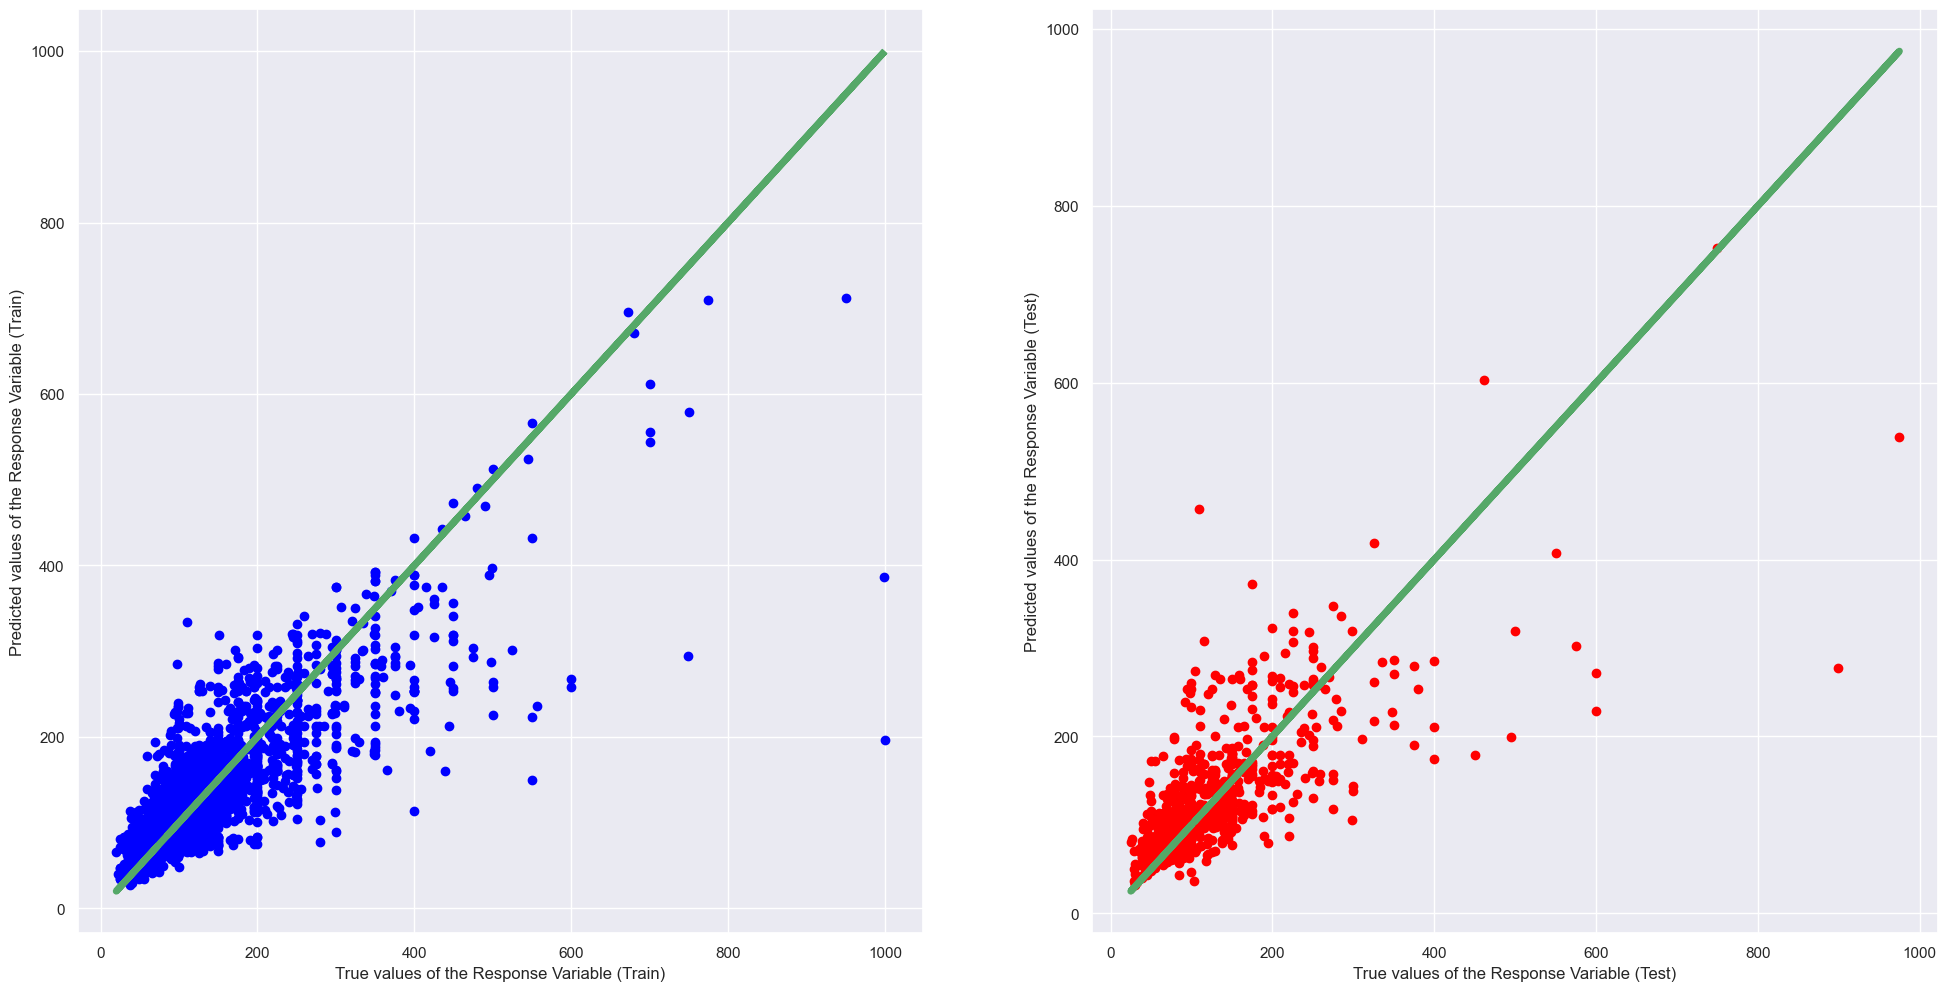

In [96]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [98]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))


print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 4091.8742
Linear Regression (R^2): 0.511

Ridge Regression (MSE): 4121.0756
Ridge Regression (R^2): 0.5075

Lasso Regression (MSE): 4120.9395
Lasso Regression (R^2): 0.5075

Random Forest Regression (MSE): 4046.8074
Random Forest Regression (R^2): 0.5163

XGBoost (MSE): 4038.352
XGBoost (R^2): 0.5173

CatBoost (MSE): 4003.3575
CatBoost (R^2): 0.5215


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.5022
Ridge Regression (R^2): 0.5028
Lasso Regression (R^2): 0.5028
Random Forest Regression (R^2): 0.569
XGBoost (R^2): 0.6751
CatBoost (R^2): 0.6762


In [108]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=10, shuffle=True, random_state=100)  # Enable shuffle

scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR = cross_validate(linreg, X, y, cv=kf, scoring=scoring)
results_kfold_Ridge = cross_validate(ridgeReg, X, y, cv=kf, scoring=scoring)
results_kfold_Lasso = cross_validate(lassoReg, X, y, cv=kf, scoring=scoring)
results_kfold_RF = cross_validate(RF, X, y, cv=kf, scoring=scoring)
results_kfold_XGB = cross_validate(xgb_reg, X, y, cv=kf, scoring=scoring)
results_kfold_CatB = cross_validate(CatB, X, y, cv=kf, scoring=scoring)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

0:	learn: 86.8424106	total: 1.16ms	remaining: 2.31s
1:	learn: 83.6170769	total: 2.21ms	remaining: 2.2s
2:	learn: 80.6741633	total: 3.11ms	remaining: 2.07s
3:	learn: 78.2222074	total: 4.02ms	remaining: 2s
4:	learn: 75.9952286	total: 4.44ms	remaining: 1.77s
5:	learn: 74.1341373	total: 4.76ms	remaining: 1.58s
6:	learn: 72.5358374	total: 5.13ms	remaining: 1.46s
7:	learn: 71.3292127	total: 5.48ms	remaining: 1.36s
8:	learn: 70.0664424	total: 5.81ms	remaining: 1.28s
9:	learn: 69.0800005	total: 6.22ms	remaining: 1.24s
10:	learn: 68.2021205	total: 6.5ms	remaining: 1.18s
11:	learn: 67.4762170	total: 6.85ms	remaining: 1.13s
12:	learn: 66.8696108	total: 7.1ms	remaining: 1.08s
13:	learn: 66.2622468	total: 7.33ms	remaining: 1.04s
14:	learn: 65.7441449	total: 7.68ms	remaining: 1.02s
15:	learn: 65.2674228	total: 7.98ms	remaining: 989ms
16:	learn: 64.8855924	total: 8.26ms	remaining: 963ms
17:	learn: 64.5719840	total: 8.53ms	remaining: 939ms
18:	learn: 64.2529055	total: 8.89ms	remaining: 927ms
19:	learn

In [110]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()

print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.4941
Ridge Regression R^2: 0.4594
Lasso Regression R^2: 0.472
Random Forest R^2: 0.5185
XGBooost R^2: 0.4964
CatBoost R^2: 0.4989

Linear Regression MSE: 4118.5972
Ridge Regression MSE: 4470.1898
Lasso Regression MSE: 4331.607
Random Forest MSE: 3956.6169
XGBooost MSE: 4040.2512
CatBoost MSE: 4010.7019


In [116]:
pip install treeinterpreter


Note: you may need to restart the kernel to use updated packages.


In [118]:
from treeinterpreter import treeinterpreter as ti
instance = X.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(RF,instance)
for i in range(len(instance)):
    print("True Value:",trueInstance['price']) 
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor 

True Value: 1235    150
Name: price, dtype: int64

Prediction: [[148.40315514]]

Feature contributions:
-------------------------
bedrooms -24.7156
hot_tub_sauna_or_pool 12.1778
room_type_Entire_home_apt 10.8159
gym 10.1512
room_type_Private_room 7.2651
elevator 7.0215
property_type_Apartment -2.77
tv 2.7638
property_type_House -1.9244
secure -1.8408
number_of_reviews -1.2107
room_type_Shared_room 0.8885
pets_allowed 0.5394
white_goods 0.236
breakfast 0.1873
accessible 0.1707
property_type_Townhouse -0.131
internet 0.1094
property_type_Condominium -0.0403
property_type_Loft 0.034
property_type_Other 0.0164
property_type_Bed_and_Breakfast -0.0019


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor 

Conclusion

From the information above, by comparing the MSE (for test sets) and R^2 (for train sets) of the different models (in which the lower the MSE & higher the R^2 is, the more accurate it is), we can see which regression model is the best at predicting the price of a listing based on room_type, property_type, bedrooms, amenities and number_of_reviews.

As seen from both validation methods, we can see that Random Forest Regression showed the best results, with the highest R^2 value and the lowest MSE value.

The different graphs of True Values VS Predicting Values for each regression model (can be seen under the heading of the different models) can also give us a rough idea on which model is best at predicting. As such, our conclusion above can be said true as the graph of the Random Forest Regression generally has the most number of points situated near the diagonal line.

 
Answering the Problem

From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

Entire properties listed instead of just a single room fetch the highest prices.
Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
The reviews a listing gets (quality or quantity) does not have much of an impact in its price.